In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [ ]:
train_data = datasets.FashionMNIST(root = "data",
                                   train = True,
                                   download=True,
                                   transform =ToTensor(),
                                   target_transform = None)

test_data= datasets.FashionMNIST(root = "data",
                                 train = False,
                                 download  = True,
                                 transform = ToTensor(),
                                 target_transform = None)



100%|██████████| 26421880/26421880 [00:02<00:00, 9461694.02it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 175345.12it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3140068.44it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22897430.53it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
image,label = train_data[0]

print(label)

9


In [ ]:
len(train_data), len(test_data)


(60000, 10000)

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

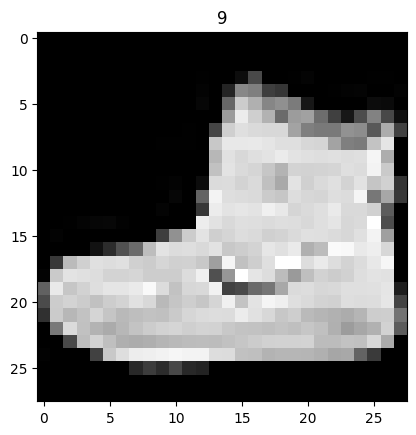

In [ ]:
image, label = train_data[0]
image.shape
plt.imshow(image.squeeze(),cmap='gray')
plt.title(label)

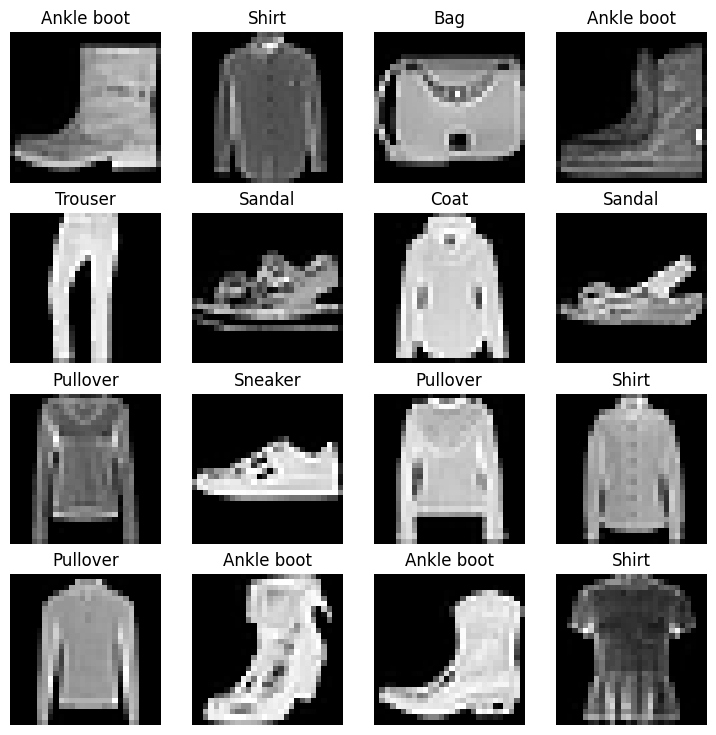

In [ ]:
#Lets view more

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
class_names = train_data.classes
rows, cols = 4, 4
for i in range(1,rows*cols +1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]

  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Lenght of train data loader : {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Lenght of test data loader : {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7af8b75c6770>, <torch.utils.data.dataloader.DataLoader object at 0x7af8b75c6710>)
Lenght of train data loader : 1875 batches of 32
Lenght of test data loader : 313 batches of 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

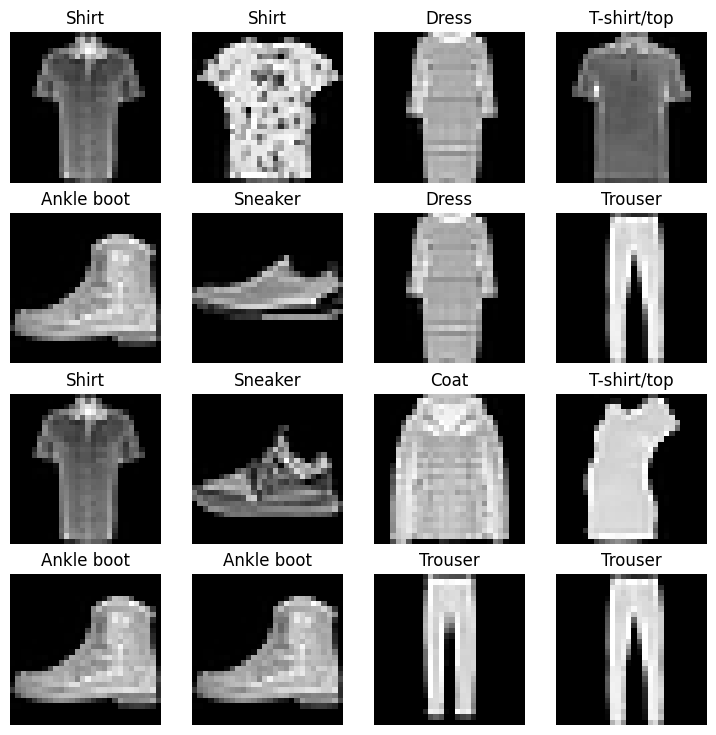

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))

rows, cols = 4, 4
for i in range(1,rows*cols +1):
  random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()

  img,label = train_features_batch[random_idx], train_labels_batch[random_idx]

  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
flatten_model = nn.Flatten()

x= train_features_batch[0]

output = flatten_model(x)

print(x.shape)
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [ ]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names)
)

model_0.to('cpu')

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.1)

In [ ]:
from timeit import  default_timer as timer
def print_train_time(start:float, end: float, device: torch.device = None):
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time


In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch} \n -----')

  train_loss = 0
  for batch, (X,y)  in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss  #acumulate per epoch
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    if batch %400 ==0:
      print(f"looked at {batch *len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /=len(train_dataloader)


  model_0.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred = model_0(X)

      loss = loss_fn(test_pred, y)

      test_loss += loss

      test_acc += accuracy_fn(y_true = y, y_pred=test_pred.argmax(dim =1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f'\n Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}, Test_acc: {test_acc:.2f}%\n')

  #calculate time
  train_time_end_on_cpu = timer()

  total_train_time_model_0= print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu,
                                             device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 -----
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 Train Loss: 0.59039 | Test Loss: 0.50954, Test_acc: 82.04%

Train time on cpu: 9.722 seconds
Epoch: 1 
 -----
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 Train Loss: 0.47633 | Test Loss: 0.47989, Test_acc: 83.20%

Train time on cpu: 18.857 seconds
Epoch: 2 
 -----
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 Train Loss: 0.45503 | Test Loss: 0.47664, Test_acc: 83.43%

Train time on cpu: 28.139 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device = device):
  loss, acc = 0,0

  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      y_pred = model_0(X.to(device))

      loss = loss_fn(y_pred, y.to(device))

      loss += loss

      acc += accuracy_fn(y_true = y, y_pred=y_pred.argmax(dim =1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"Model_name ": model.__class__.__name__,
          "Model_loss ": loss.item(),
          "Model_acc  ": acc}

model_0_results = eval_model(model = model_0, data_loader = test_dataloader, loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results


{'Model_name ': 'FashionMNISTModelV0',
 'Model_loss ': 0.0021073275711387396,
 'Model_acc  ': 83.42651757188499}

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

**Model 1 - adding non linearity**


In [ ]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape = int, hidden_units = int, output_shape = int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
import torch
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, hidden_units = 10, output_shape = len(class_names)).to(device)

next(model_1.parameters()).device


device(type='cuda', index=0)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [ ]:
def train_step(model:nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0,0
  model.to(device)
  for batch, (X,y)  in enumerate(data_loader):
    X,y = X.to(device), y.to(device)

    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    train_loss += loss

    train_acc += accuracy_fn(y,y_pred.argmax(dim =1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | TestLoss: {train_acc:.5f}% \n")

def test_step(model:nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn):
  model.eval()
  test_loss, test_acc = 0,0
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)

      test_pred = model(X)

      loss = loss_fn(test_pred, y)
      test_loss += loss

      acc = accuracy_fn(y, test_pred.argmax(dim = 1))
      test_acc += acc

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}% \n")

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn
  )
  test_step(model = model_1,
            data_loader = train_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn)

  train_time_end_on_gpu = timer()

  total_train_time_on_gpu = print_train_time(start = train_time_start_on_gpu,
                                             end = train_time_end_on_gpu,
                                             device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.80838 | TestLoss: 70.84167% 

Test Loss: 0.67858 | Test Acc: 75.65667% 

Train time on cuda: 15.218 seconds
Epoch: 1
--------
Train loss: 0.66879 | TestLoss: 75.91333% 

Test Loss: 0.64739 | Test Acc: 76.47667% 

Train time on cuda: 30.191 seconds
Epoch: 2
--------
Train loss: 0.64107 | TestLoss: 76.68667% 

Test Loss: 0.62387 | Test Acc: 77.26333% 

Train time on cuda: 47.108 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device = device):
  loss, acc = 0,0

  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)
      y_pred = model(X)

      loss = loss_fn(y_pred, y)

      loss += loss

      acc += accuracy_fn(y_true = y, y_pred=y_pred.argmax(dim =1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"Model_name ": model.__class__.__name__,
          "Model_loss ": loss.item(),
          "Model_acc  ": acc}

In [ ]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)

model_1_results

{'Model_name ': 'FashionMNISTModelV1',
 'Model_loss ': 0.002353874733671546,
 'Model_acc  ': 75.7488019169329}

**CONVOLUTIONAL NEURAL NETWORK**

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride =1,
                  padding =1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding =1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding =1 ),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding =1 ),
        nn.ReLU(),
        nn.MaxPool2d(2)

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_shape)
    )
  def forward(self,x:torch.Tensor):
    x= self.block_1(x)
    x= self.block_2(x)
    x= self.classifier(x)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1, hidden_units =10, output_shape = len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

In [74]:
def test_step(model:nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn,
              device:torch.device):
  model.eval()
  test_loss, test_acc = 0,0
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)

      test_pred = model(X)

      loss = loss_fn(test_pred, y)
      test_loss += loss

      acc = accuracy_fn(y, test_pred.argmax(dim = 1))
      test_acc += acc

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.5f}% \n")

In [75]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.29020 | TestLoss: 89.56167% 

Test Loss: 0.30665 | Test Acc: 89.11741% 

Epoch: 1
---------
Train loss: 0.27958 | TestLoss: 89.82833% 

Test Loss: 0.31051 | Test Acc: 88.86781% 

Epoch: 2
---------
Train loss: 0.27224 | TestLoss: 90.23333% 

Test Loss: 0.29323 | Test Acc: 89.66653% 

Train time on cuda: 35.063 seconds


In [76]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'Model_name ': 'FashionMNISTModelV2',
 'Model_loss ': 0.0013054052833467722,
 'Model_acc  ': 89.66653354632588}

In [77]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,Model_name,Model_loss,Model_acc
0,FashionMNISTModelV0,0.002107,83.426518
1,FashionMNISTModelV1,0.002354,75.748802
2,FashionMNISTModelV2,0.001305,89.666534


In [79]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_on_gpu,
                                    total_train_time_model_2]
compare_results

,Model_name,Model_loss,Model_acc,training_time
0,FashionMNISTModelV0,0.002107,83.426518,28.139141
1,FashionMNISTModelV1,0.002354,75.748802,47.108010
2,FashionMNISTModelV2,0.001305,89.666534,35.062602


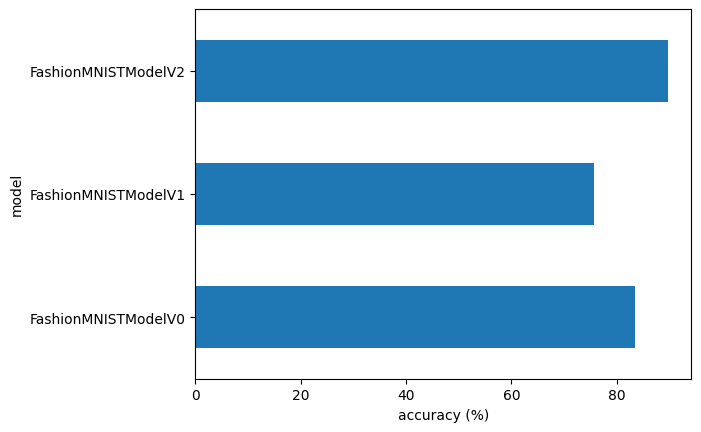

In [80]:
compare_results.set_index("Model_name ")["Model_acc  "].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [81]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [82]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [83]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[9.4648e-09, 1.4772e-08, 1.4989e-07, 6.2717e-09, 1.6464e-07, 9.9998e-01,
         8.4266e-08, 5.9573e-07, 8.7742e-07, 1.9512e-05],
        [1.4527e-02, 9.1913e-01, 7.0861e-04, 6.9338e-03, 1.0126e-02, 9.8703e-05,
         4.7604e-02, 8.1507e-05, 3.4095e-04, 4.4607e-04]])

In [84]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [85]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

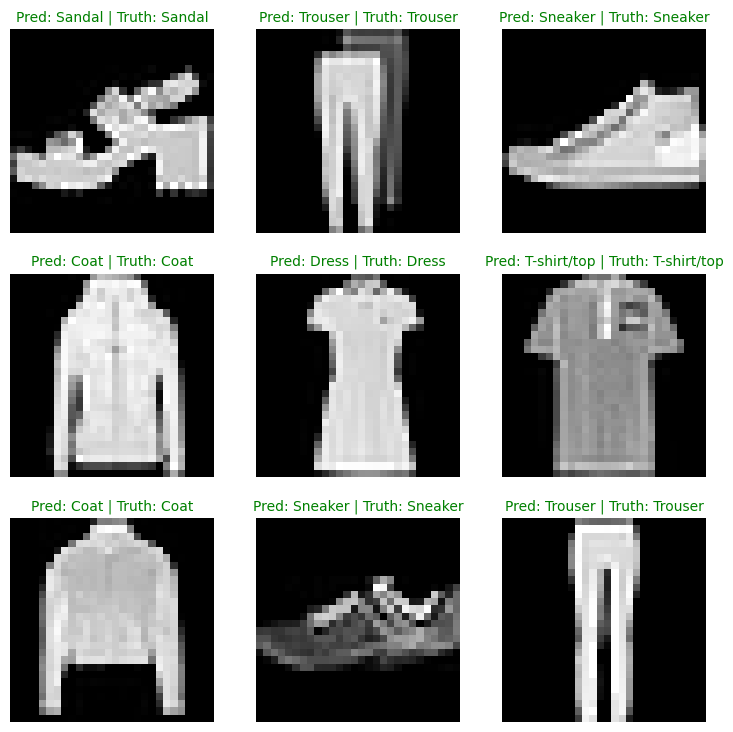

In [86]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);